# Análise Exploratória de Dados (Python)

## Bibliotecas importadas

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.robust.scale import mad
import wquantiles

plt.style.use('seaborn')

## Análise da população e taxas de homicídio

### Descrição do conjunto de dados

O conjunto de dado (_dataset_) analisado neste _notebook_ contém os dados populacionais de de taxa de assassinato (em unidades por 100.000 pessoas por ano) para cada um do 50 estados americanos, de acordo com o Censo 2010 desse país.

### Carregamento dos dados

In [2]:
state = pd.read_csv('../data/state.csv')

As primeiras cinco linhas do _dataset_ são as seguintes:

In [3]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Dimensões do _dataset_:

In [4]:
state.shape

(50, 4)

### Medidas de posição

A populaçãp média por estado nos EUA em 2010 foi de:

In [5]:
state['Population'].mean()

6162876.3

Por sua vez, a mediana da da população é: 

In [6]:
state['Population'].median()

4436369.5

O fato de que a média é maior que a mediana é um indicativo da existência de estados cuja população é muito maior que os demais (valores extremos). Uma forma de contornar esse "problema" é retirar do cálculo da média alguns desses valores extremos. Isso pode ser feito por meio de uma média aparada.

Em **Python**, isso pode ser feito por meio dda função `trim_mean` do módulo `scipy.stats`. Por exemplo, retirando 10% dos dados em cada extremidade, tem-se:

In [9]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

Quanto à taxa de assassinatos, uma informação importante é a taxa de assassinato nacional. Para esse cálculo da taxa de assassinato ponderada pela população, pode-se utilizar a função `weighted.mean` do pacote **R** `matrixStats`: 

Quanto à taxa de assassinatos, uma informação importante é a taxa de assassinato nacional. Para esse cálculo da taxa de assassinato ponderada pela população, pode-se utilizar a função `averate` da biblioteca `numpy` ou a função `median` da biblioteca `wquantiles`: 

**Média Ponderada:**

In [11]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

**Mediana Ponderada:**

In [12]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

### Medidas de Dispersão

**Desvio Padrão:**

In [14]:
state['Population'].std()

6848235.347401142

**Intervalo Interquartil ($IQR$):**

In [15]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

**Desvio Absoluto Mediano ($MAD$):**

In [16]:
mad(state['Population'])

3849876.1459979336

### Exploração da Distribuição

**Quantis** da distribuição de dados de taxa de assassinato:

In [18]:
state['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

Em especial, os quantis representativos de 25%, 50% e 75% são denominados **quartis** e o quartil 50% é a própria mediana da distribuição. 

Visualização gráfica dos **quartis** em um gráfico de tipo _boxplot_:

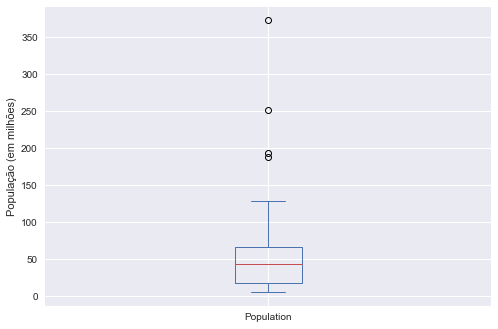

In [20]:
ax = (state['Population'] / 100000).plot.box()
ax.set_ylabel('População (em milhões)')
ax.set(xlabel=None)
plt.show()

### Tabelas de Frequência e Histogramas

In [26]:
binned_population = pd.cut(state['Population'], 10)
binned_population.value_counts().to_frame()

,Population
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0
"(29915890.0, 33584923.0]",0


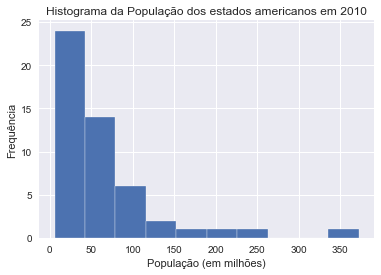

In [29]:
ax = (state['Population'] / 100000).plot.hist(figsize=(6,4), edgecolor='white')
ax.set_xlabel("População (em milhões)")
ax.set_ylabel("Frequência")
ax.set_title("Histograma da População dos estados americanos em 2010")
plt.show()

### Gráficos de densidade e estimativas

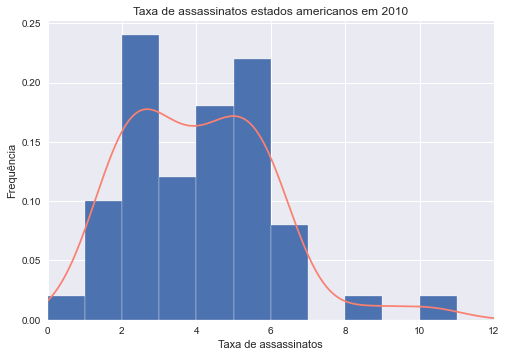

In [39]:
ax = state['Murder.Rate'].plot.hist(density = True, 
                                    xlim = [0, 12], 
                                    bins = range(0, 12),
                                    edgecolor = 'white')
state['Murder.Rate'].plot.density(ax = ax, color = 'salmon')
ax.set_xlabel("Taxa de assassinatos")
ax.set_ylabel("Frequência")
ax.set_title("Taxa de assassinatos estados americanos em 2010")
plt.show()

## Dados Binários e Dados Categóricos

In [40]:
dfw = pd.read_csv('../data/dfw_airline.csv')

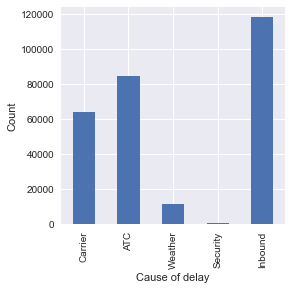

In [42]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')
plt.show()

### Correlação

In [49]:
sp500_px = pd.read_csv('../data/sp500_data.csv', index_col=0)
sp500_px.index = pd.to_datetime(sp500_px.index)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [51]:
sp500_sym = pd.read_csv('../data/sp500_sectors.csv')
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [52]:
sp500_sym['sector'].value_counts()

financials                     88
consumer_discretionary         84
industrials                    68
information_technology         66
health_care                    56
energy                         40
consumer_staples               36
utilities                      29
materials                      28
etf                            17
telecommunications_services     5
Name: sector, dtype: int64

In [54]:
telecom_symbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecom_symbols]

In [56]:
telecom.head()

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


In [55]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [ ]:
etf = sp500_px.loc[sp500_px.index > '2012-07-01']